In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [44]:
dt = pd.read_csv('slump_test.data', index_col = 0)
dt.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
No,,,,,,,,,,
1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


## EDA

In [5]:
dt.shape

(103, 10)

In [9]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 1 to 103
Data columns (total 10 columns):
Cement                                103 non-null float64
Slag                                  103 non-null float64
Fly ash                               103 non-null float64
Water                                 103 non-null float64
SP                                    103 non-null float64
Coarse Aggr.                          103 non-null float64
Fine Aggr.                            103 non-null float64
SLUMP(cm)                             103 non-null float64
FLOW(cm)                              103 non-null float64
Compressive Strength (28-day)(Mpa)    103 non-null float64
dtypes: float64(10)
memory usage: 8.9 KB


+ No missing values
+ All features are numerical

In [7]:
dt.describe()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.00000,103.000000
mean,229.894175,77.973786,149.014563,197.167961,8.539806,883.978641,739.604854,18.048544,49.61068,36.039417
std,78.877230,60.461363,85.418080,20.208158,2.807530,88.391393,63.342117,8.750844,17.56861,7.838232
min,137.000000,0.000000,0.000000,160.000000,4.400000,708.000000,640.600000,0.000000,20.00000,17.190000
25%,152.000000,0.050000,115.500000,180.000000,6.000000,819.500000,684.500000,14.500000,38.50000,30.900000
50%,248.000000,100.000000,164.000000,196.000000,8.000000,879.000000,742.700000,21.500000,54.00000,35.520000
75%,303.900000,125.000000,235.950000,209.500000,10.000000,952.800000,788.000000,24.000000,63.75000,41.205000
max,374.000000,193.000000,260.000000,240.000000,19.000000,1049.900000,902.000000,29.000000,78.00000,58.530000


+ Mean vs median: check skewness.
+ min and max: check outliers.

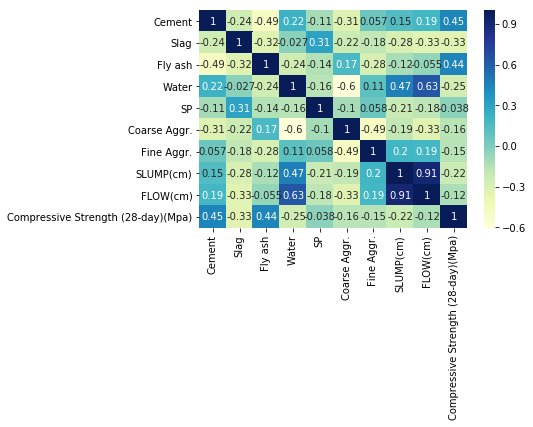

In [15]:
sns.heatmap(dt.corr(), annot=True, cmap="YlGnBu")
plt.show()

+ Cement and Fly ash are negative correlated to each other, but positive correlated to Compressive Strength.
+ Water is negative correlated to Coarse Aggr., and positive correlated to SLUMP and FLOW.
+ Coarse Aggr. and Fine Aggr. are negative correlated to each other.
+ SLUMP and FLOW are highly positive correlated.

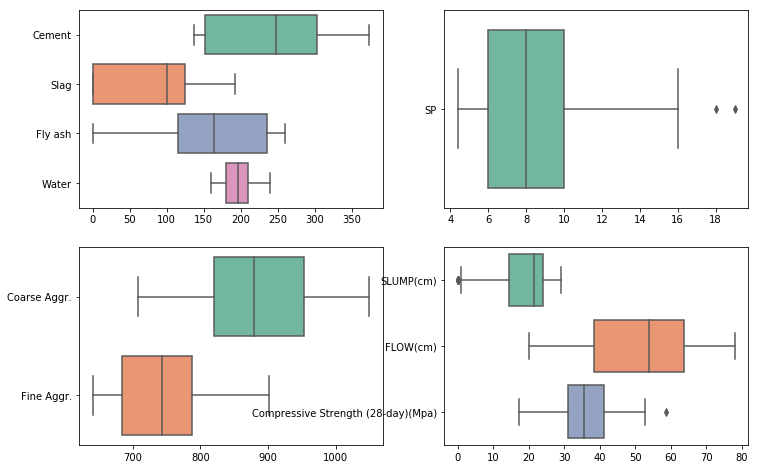

In [29]:
plt.figure(figsize = (12,8))

plt.subplot(221)
cols = ['Cement', 'Slag', 'Fly ash', 'Water']
sns.boxplot(data = dt[cols], orient="h", palette="Set2")

plt.subplot(222)
cols = ['SP']
sns.boxplot(data = dt[cols], orient="h", palette="Set2")

plt.subplot(223)
cols = ['Coarse Aggr.', 'Fine Aggr.']
sns.boxplot(data = dt[cols], orient="h", palette="Set2")

plt.subplot(224)
cols = ['SLUMP(cm)', 'FLOW(cm)','Compressive Strength (28-day)(Mpa)']
sns.boxplot(data = dt[cols], orient="h", palette="Set2")
plt.show()


+ The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.
+ Sp, SLUMP, and Compressive strength have outliers

/Users/weishunji/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


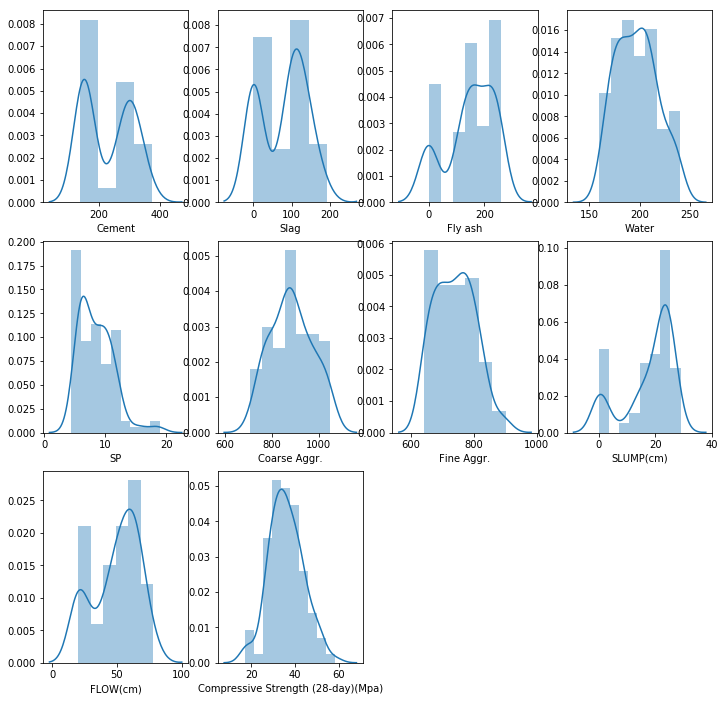

In [39]:
i = 1
plt.figure(figsize = (12,12))
for col in dt.columns:
    plt.subplot(3,4,i)
    sns.distplot(dt[col])
    i+=1
plt.show()

+ Water and Compressive strength are normally distributed.
+ Cement, Slag, SLUMP and Flow are bimodal distributed.
+ SP is right skewed.

## Analysis on CS

In [103]:
cols_keep = ['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.','Compressive Strength (28-day)(Mpa)']
dt = dt[cols_keep]
dt.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,Compressive Strength (28-day)(Mpa)
No,,,,,,,,
1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,34.99
2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,41.14
3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,41.81
4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,42.08
5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,26.82


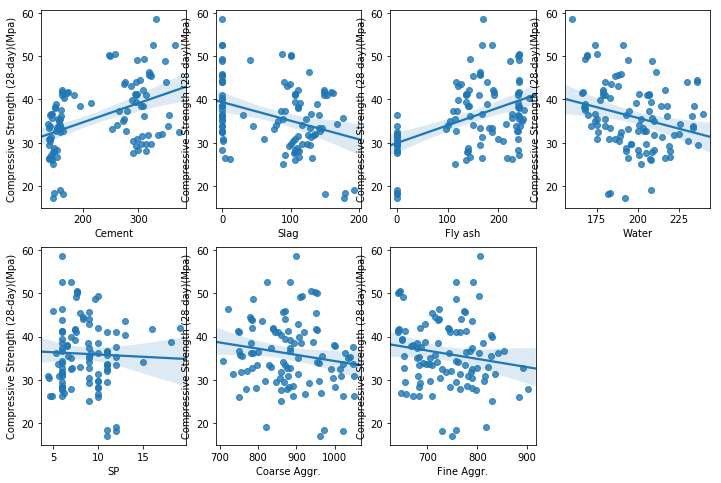

In [86]:
i = 1
plt.figure(figsize = (12,8))
for col in dt.columns[:7]:
    plt.subplot(2,4,i)
    sns.regplot(x=col, y="Compressive Strength (28-day)(Mpa)", data=dt)
    i+=1
plt.show()

In [108]:
_, bins = np.histogram(dt['Compressive Strength (28-day)(Mpa)'], bins = 4)
t = np.zeros(len(dt))
for b in bins[:-1]:
    t += 1*(dt['Compressive Strength (28-day)(Mpa)']>=b)
dt['CS'] = t

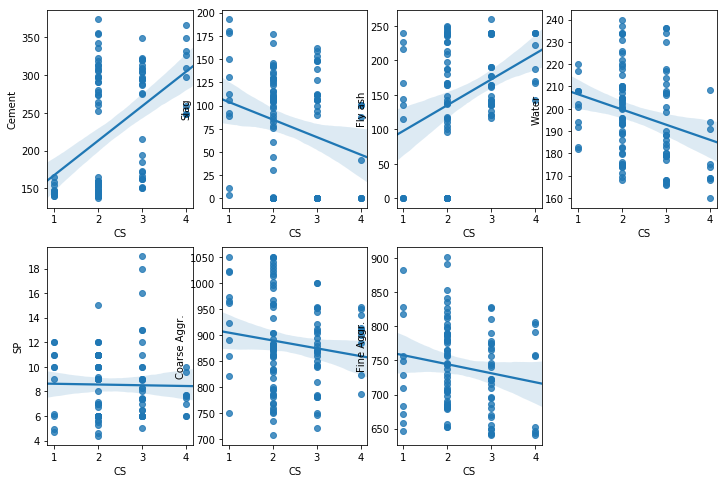

In [109]:
i = 1
plt.figure(figsize = (12,8))
for col in dt.columns[:7]:
    plt.subplot(2,4,i)
    sns.regplot(x = dt['CS'], y = dt[col])
    i+=1
plt.show()

In [113]:
dt.corr()[['Compressive Strength (28-day)(Mpa)','CS']]

,Compressive Strength (28-day)(Mpa),CS
Cement,0.445725,0.458588
Slag,-0.331588,-0.247385
Fly ash,0.444393,0.345958
Water,-0.254235,-0.267066
SP,-0.037871,-0.017251
Coarse Aggr.,-0.160684,-0.134637
Fine Aggr.,-0.154484,-0.165543
Compressive Strength (28-day)(Mpa),1.000000,0.929391
CS,0.929391,1.000000


+ Cement is positive correlated to CS, which means large cements usually corresponds to large CS. For example, when Cement is around 150, CS basically falls in bin 1 and 2.
+ Cement is the most predictive of CS because Cement has the largest correlation, which is 0.4586, to CS. Another most predictive feature is Slag because it has large correlation. The reason why I don't choose Fly ash is that Fly ash is correlated to Cement and it has outliers.

## Decision Tree

In [153]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split

In [121]:
cols = ['Cement', 'Slag']
X = dt[cols]
y = dt['Compressive Strength (28-day)(Mpa)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [125]:
def rmse(y, pred):
    return np.mean((y - pred)**2)**0.5

In [132]:
max_depths = np.linspace(1, 10, 10, endpoint=True)

train_results = []
test_results = []

for max_dep in max_depths:
    ds_model = DecisionTreeRegressor(max_depth = max_dep)
    ds_model.fit(X_train, y_train)

    train_pred = ds_model.predict(X_train)
    train_results.append(rmse(y_train, train_pred))
    
    test_pred = ds_model.predict(X_test)
    test_results.append(rmse(y_test, test_pred))

results = pd.DataFrame({'Max_Depth': max_depths, 'Train_error': train_results,
                        'Test_error': test_results})
results

,Max_Depth,Test_error,Train_error
0,1.0,5.744036,7.189724
1,2.0,5.896440,6.280920
2,3.0,5.727892,5.744576
3,4.0,6.432475,4.330416
4,5.0,6.673372,3.480268
5,6.0,7.810759,2.825759
6,7.0,8.202241,2.028235
7,8.0,7.895476,1.550746
8,9.0,8.156203,1.295297
9,10.0,7.616064,1.132863


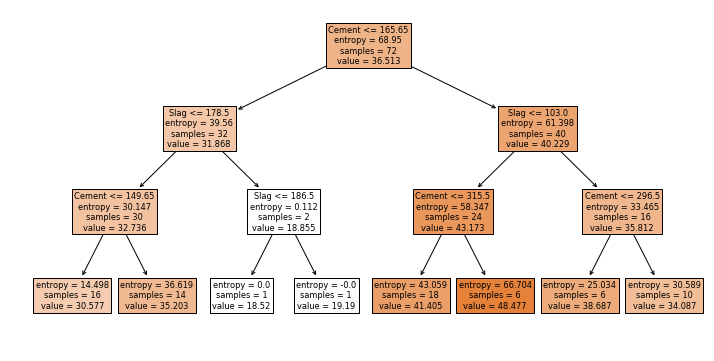

In [165]:
ds_model = DecisionTreeRegressor(max_depth = 3)
ds_model.fit(X_train, y_train)

plt.figure(figsize = (12,6))
plot_tree(ds_model, filled = True, feature_names = cols)
plt.show()

In [166]:
pred = ds_model.predict(X_test)
rmse(y_test, pred)

5.727892230989879

+ To understand the decision tree, we go through the decision process from the top to the bottom. For example, if the Cement is less than 165.65, we go to the left node. Then, if the Slag is less than 178.5, we go to the left node. Then, if the Cement is greater than 149.65, we go the right node. Finally, we predict CS as 35.203.
+ The test error is a measurement of model performance on data which is not used in training.
+ The ideal depth is 3 which is determined by hyperparameter tuning.
+ The test error RMSE is 5.72. It means that the difference between our prediction and observation in CS is likely to less than 5.72 and very likely to less than 11.44.

## Random Forest

In [167]:
from sklearn.ensemble import RandomForestRegressor

In [182]:
cols = ['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.', 'Fine Aggr.']
X = dt[cols]
y = dt['Compressive Strength (28-day)(Mpa)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [186]:
n_trees = [int(x) for x in np.linspace(100, 1900, 10, endpoint=True)]

train_results = []
test_results = []

for n_tree in n_trees:
    rf_model = RandomForestRegressor(max_depth = 3, n_estimators = n_tree, 
                                     random_state = 123)
    rf_model.fit(X_train, y_train)

    train_pred = rf_model.predict(X_train)
    train_results.append(rmse(y_train, train_pred))
    
    test_pred = rf_model.predict(X_test)
    test_results.append(rmse(y_test, test_pred))

results = pd.DataFrame({'N_trees': n_trees, 'Train_error': train_results,
                        'Test_error': test_results})
results

,N_trees,Test_error,Train_error
0,100,2.330444,2.939575
1,300,2.347333,2.930923
2,500,2.368523,2.931895
3,700,2.324123,2.933858
4,900,2.320705,2.924810
5,1100,2.333900,2.929826
6,1300,2.341745,2.929328
7,1500,2.335762,2.926373
8,1700,2.334120,2.927744
9,1900,2.337084,2.925788


In [188]:
rf_model = RandomForestRegressor(max_depth = 3, n_estimators = 900, random_state = 123)
rf_model.fit(X_train, y_train)

pred = rf_model.predict(X_test)
rmse(y_test, pred)

2.320705029338652

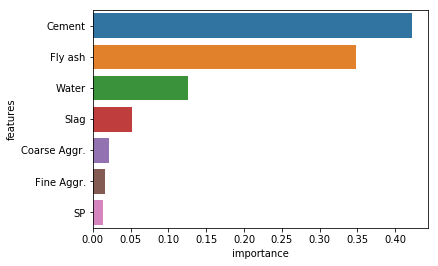

In [198]:
t = pd.DataFrame({'features': cols, 'importance': rf_model.feature_importances_})
t = t.sort_values(by = 'importance', ascending = False)
sns.barplot(x = 'importance', y = 'features', data = t)
plt.show()

+ The model includes 900 trees and I determine it by hyperparameter tuning.(Try different number of trees and pick the one which gives us best test error.)
+ The random forest should account for all input features but features have different importance. Cement, Fly ash, Water and Slag have large feature importance which means random forest account more for these features.

## More thoughts

+ I may try some simple model, like GLM.
+ Weather data like sunlight, temperature and rainfall.
+ Take the log transformantion for skewed input feature and deal with collinearity of Cement and Fly ash.
+ The random forest model gives us the feature importance which the influence of input features on compressive strength. So, it provides us some guidance about how to improve the compressive strength, like we can increase the value of Cement.